In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Set path
import sys, os
sys.path.append(os.path.dirname(os.getcwd()))

import numpy as np
import matplotlib.pyplot as plt
import fastlens
import python
import testdata
from scipy.interpolate import InterpolatedUnivariateSpline as ius
from scipy.interpolate import interp1d

In [3]:
mag_limb1= fastlens.mag_fft.magnification_limb(1)

<>:19: SyntaxWarning: invalid escape sequence '\&'
<>:19: SyntaxWarning: invalid escape sequence '\&'
/var/folders/1m/ncv9_zyd2jx24czdhnwkm_3w0000gn/T/ipykernel_25687/2607542216.py:19: SyntaxWarning: invalid escape sequence '\&'
  ax.plot(u/rho, a_wb /a_true-1, lw=2, label='Tyalor exp. [Witt \& Atrio-Barandela (2019)]')


0.1
CPU times: user 1.98 ms, sys: 224 µs, total: 2.21 ms
Wall time: 2.31 ms
CPU times: user 920 ms, sys: 7.8 ms, total: 928 ms
Wall time: 943 ms
CPU times: user 128 ms, sys: 1.09 ms, total: 129 ms
Wall time: 130 ms
CPU times: user 994 µs, sys: 456 µs, total: 1.45 ms
Wall time: 3.02 ms
1.0
CPU times: user 4.57 ms, sys: 1.36 ms, total: 5.93 ms
Wall time: 1.5 ms
CPU times: user 1.37 s, sys: 215 ms, total: 1.58 s
Wall time: 946 ms
CPU times: user 112 ms, sys: 821 µs, total: 112 ms
Wall time: 113 ms
CPU times: user 809 µs, sys: 133 µs, total: 942 µs
Wall time: 947 µs
10.0
CPU times: user 3.38 ms, sys: 791 µs, total: 4.17 ms
Wall time: 1.4 ms
CPU times: user 1.17 s, sys: 110 ms, total: 1.28 s
Wall time: 953 ms
CPU times: user 122 ms, sys: 890 µs, total: 123 ms
Wall time: 124 ms
CPU times: user 878 µs, sys: 154 µs, total: 1.03 ms
Wall time: 1.04 ms


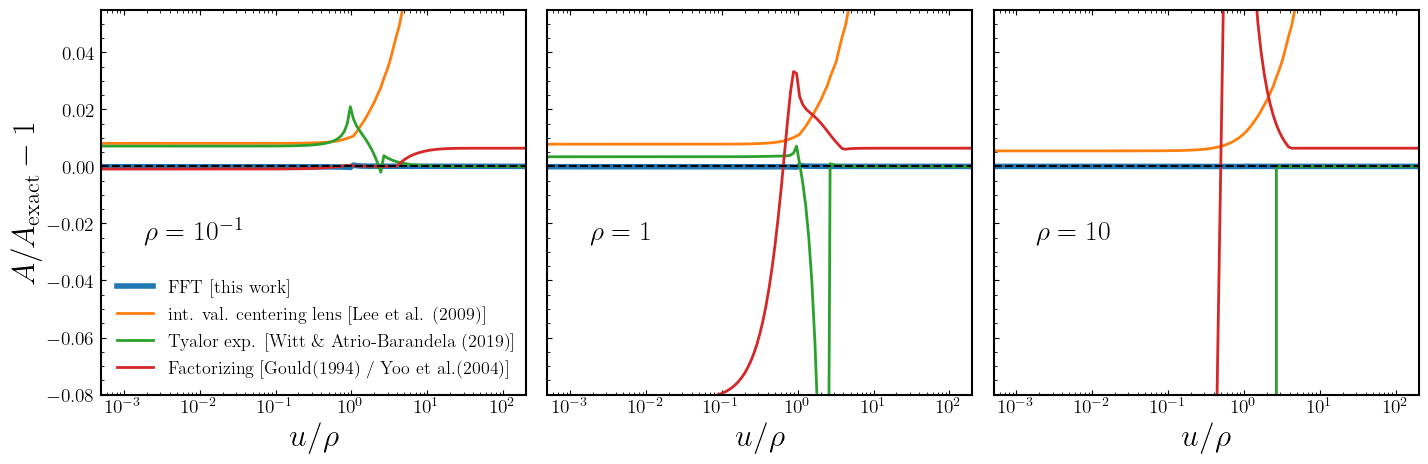

In [4]:
fig, axes = plt.subplots(1,3, figsize=(17, 5))
plt.subplots_adjust(wspace=0.05)

for i in range(3):
    ax = axes[i]
    r = ['1e-1', '1', '10'][i]
    text = [r'$\rho=10^{-1}$', r'$\rho=1$', r'$\rho=10$'][i]
    name = 'limb'
    
    u, rho, a_true = testdata.get_test_data('testdata/%s_%s.txt'%(name, r))
    print(rho)
    %time a_fft = mag_limb1.A(u.copy(), rho)
    %time a_lee = python.mag_lee.A_limb(u.copy(), rho, n1=200, n2=200, order=1)
    %time a_wb  = python.mag_wb.A_limb(u.copy(), rho)
    %time a_g   = python.mag_yoo.A_limb(u.copy(), rho)
    ax.set_xscale('log')
    ax.plot(u/rho, a_fft/a_true-1, lw=4, label='FFT [this work]')
    ax.plot(u/rho, a_lee/a_true-1, lw=2, label='int. val. centering lens [Lee et al. (2009)]')
    ax.plot(u/rho, a_wb /a_true-1, lw=2, label='Tyalor exp. [Witt \& Atrio-Barandela (2019)]')
    ax.plot(u/rho, a_g  /a_true-1, lw=2, label='Factorizing [Gould(1994) / Yoo et al.(2004)]')
    ax.axhline(0.0, color='k', linestyle='--')
    #ax.set_ylim(-0.023, 0.055)
    ax.set_ylim(-0.08, 0.055)
    ax.set_xlim(5e-4, 2e2)
    ax.set_xlabel(r'$u/\rho$', fontsize=23)
    ax.text(0.1, 0.4, text, fontsize=20, transform=ax.transAxes)
    if i>0:
        plt.setp(axes[i].get_yticklabels(), visible=False)

axes[0].legend(frameon=False, fontsize=13)
axes[0].set_ylabel(r'$A/A_{\rm exact}-1$', fontsize=23)
plt.show()